# Task 2, Exploring Supervised Machine Learning
This is a simple linear regression to predict the percentage of marks scored by a student based on the number of hours invested in studies.

# Import the necessary libraries

In [119]:
import pandas as pd
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt
%matplotlib inline

# Import data set

In [120]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
# take a look at the dataset
print("Data imported successfully:")
df

Data imported successfully:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data exploration

In [121]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [122]:
#Data info also df.shapes can be used
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


(25, 2)

In [123]:
#Check for any null values in the dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

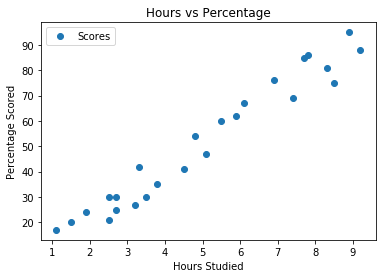

In [124]:
# Scatter Plot the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

Observing the data set and the above plot we can conclude to implement Linear Regression to predict the expected score a student can get, given the hours of study of that student.

# Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

# Prepare the data

In [125]:
#separate the dependent and independent variables
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

# Splitting the data into train and test set

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm

In [127]:
#Using sklearn package to model data.
reg = LinearRegression()  
reg.fit(X_train, y_train) 
print("Training done!")

Training done!


In [128]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
#Let's know the slope and intercept characteristics of the regression line
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.018160041434683


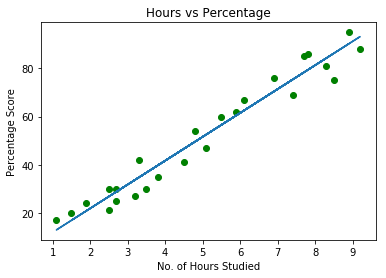

In [130]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y, color = 'g')
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

# Prediction making

In [131]:
#Prediction on X_test values 
print(X_test)
print(y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[20 27 69 30 62]


In [132]:
#Comparing Actual Vs X_test 
y_prediction = reg.predict(X_test)
df = pd.DataFrame({'Actual score':y_test,'Predicted score': y_prediction})  
df

,Actual score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [133]:
#Testing for own data
hours = 9.25
my_prediction = reg.predict(hours)
print("Predicted Score if a student studies for 9.25 hours: = {}".format(my_prediction[0]))

Predicted Score if a student studies for 9.25 hours: = 93.69173248737538


# Evaluation of the model

In [134]:
#Estimating the errors on test dataset
print("Mean Squared Error: ", mean_squared_error(y_test, y_prediction))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_prediction))
print("R2 Score: ", r2_score(y_test, y_prediction))

Mean Squared Error:  21.5987693072174
Mean Absolute Error:  4.183859899002975
R2 Score:  0.9454906892105356
